In [203]:
import sklearn as sl

sl.__version__

'0.19.1'

In [270]:
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

## Import datasets


In [241]:
train_v1 = pd.read_csv('datasets/train.csv')
test_v1 = pd.read_csv('datasets/test.csv')

In [242]:
train_v1.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Explore data

In [243]:
# Shape
train_v1.shape

(1460, 81)

In [244]:
train_v1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


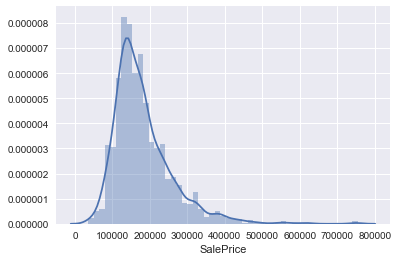

In [245]:
# Sale price distribution - normal distribution
sns.distplot(train_v1.SalePrice)

In [246]:
# Missing values
train_v1.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [247]:
def preProcessing(df):
    le = LabelEncoder()
    df_result = df.copy()
    
    for column in df_result:
        if type(df_result[column][0]) == str:
            #print('Col: %s' %column)
            df_result[column].fillna('N/A', inplace=True) # Missing values
            df_result[column] = le.fit_transform(df_result[column]) # Factorize
        else:
            if column == 'Alley' or column == 'MiscFeature' or column == 'Fence' or column == 'ExterQual' \
                or column == 'ExterCond' or column == 'BsmtQual' or column == 'BsmtCond' or column == 'BsmtExposure' :
                    df_result[column].fillna('N/A', inplace=True) # Missing values
                    df_result[column] = le.fit_transform(df_result[column]) # Factorize
            else:
                df_result[column].fillna(0, inplace=True) # Missing values
                
    df_result.drop(['3SsnPorch', 'Street', 'LandContour', 'Condition2', 
                    'BsmtFinSF2', 'Utilities', 'BsmtHalfBath', 'BsmtCond', 'MoSold', 'MiscVal'], axis=1, inplace=True)
      
    return df_result
        
            
train_v2 = preProcessing(train_v1)            
test_v2 = preProcessing(test_v1)

#train_v1.MiscFeature.unique()
#train_v2.MiscFeature.unique()

In [248]:
# Correlation
df_corr = pd.DataFrame(train_v2.corr()['SalePrice'])

In [249]:
# List features sort by correlation score

df_corr.sort_values('SalePrice')

,SalePrice
ExterQual,-0.636884
BsmtQual,-0.593734
KitchenQual,-0.589189
GarageFinish,-0.425684
GarageType,-0.415283
HeatingQC,-0.400178
BsmtExposure,-0.294589
LotShape,-0.255580
MSZoning,-0.166872
KitchenAbvGr,-0.135907


In [250]:
# Filtrando pelas colunas numericas enquanto não tranformo as variaveis categoricas.

print(train_v1.shape)

train_v2 = train_v2.select_dtypes(include=[np.number])
test_v2 = test_v2.select_dtypes(include=[np.number])

print(train_v2.shape)

(1460, 81)
(1460, 69)


In [251]:
# Create dataset train and test
train_v3 = train_v2.sample(frac=0.7, random_state=101)
test_v3 = train_v2.loc[~train_v2.index.isin(train_v3.index)]

In [252]:
# Split features and target 
train_v2_x = train_v3.drop(['Id', 'SalePrice'], axis=1)
train_v2_y = train_v3.SalePrice

test_v2_x = test_v3.drop(['Id', 'SalePrice'], axis=1)
test_v2_y = test_v3.SalePrice

In [254]:
# Linear Regression
model_lr = LinearRegression()

# Fit model
model_lr = model_lr.fit(train_v2_x, train_v2_y)

# Predict
pred_lr = model_lr.predict(test_v2_x)

In [255]:
# Avaliable result
# 1219974171.9858968
# 1211811542.6927738
# 1021423290.5953271
# 913454973.2123487
mean_squared_error(pred_lr, test_v2_y)

1211811542.6927738

In [266]:
# Create data frame compare
df = pd.DataFrame()
df['Id'] = test_v3['Id']
df['SalePriceReal'] = test_v2_y 
df['Predict'] = pred_lr
df['diff'] = df['Predict']-df['SalePriceReal']

In [267]:
df.head()

,Id,SalePriceReal,Predict,diff
1,2,181500,207619.746593,26119.746593
3,4,140000,168486.183867,28486.183867
5,6,143000,144695.418990,1695.418990
10,11,129500,121523.377241,-7976.622759
11,12,345000,387373.002908,42373.002908


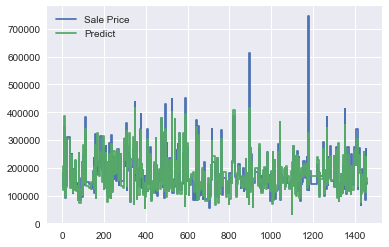

In [262]:
# Plot real and predict values

import numpy as np
from numpy import ma
import matplotlib.pyplot as plt

y = df['SalePriceReal']
x = df.index

plt.step(x, y, label='Sale Price')

y = df['Predict']
plt.step(x, y, label='Predict')

plt.legend()

#plt.xlim(0, 7)
#plt.ylim(-0.5, 4)

plt.show()

In [264]:
# Create CSV result - Linear Regression.
dfResult = pd.DataFrame()

dfResult['Id'] = test_v2['Id']
dfResult['SalePrice'] = model_lr.predict(test_v2.drop('Id', axis=1))
dfResult.to_csv('result_v2.csv', index=False)

In [275]:
model_rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, random_state = 101)

# Criando o modelo
modelo_v2 = model_rf.fit(train_v2_x, train_v2_y)

# Fazendo previsões
previsoes = modelo_v2.predict(test_v2_x)

In [276]:
# Computando o erro
mean_squared_error(previsoes, test_v2_y)

913454973.2123487

In [277]:
# Create CSV result.
dfResult = pd.DataFrame()

dfResult['Id'] = test_v2['Id']
dfResult['SalePrice'] = modelo_v2.predict(test_v2.drop('Id', axis=1))
dfResult.to_csv('result_v3.csv', index=False)